In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [31]:
# K-Means++ 初始化质心

def init_centroids(df,k):
    
    #step 1:随机寻找第一个质心
    centroids = {0: df.loc[np.random.randint(0, len(df))]}

    while k>1:
        for i in centroids.keys():
            df[i] = ((df['x'] - centroids[i][0]) ** 2+ (df['y'] - centroids[i][1]) ** 2)
            df['dist'] = df.iloc[:,2:len(centroids.keys())+2 ].min(axis=1) # 计算样本点与已存在质心的最小距离
            df['p'] = df['dist']/sum(df['dist']) #step 2: 根据最小距离计算概率
        
        #step 3：根据概率选择一个新的质心并加入质心列表
        a = np.random.rand()

        for indexs in df.index:
            a -= df.loc[indexs].values[-1]
            if a <0:
                b = {len(centroids):df.iloc[indexs,0:2]}               
                centroids.update(b)
                break;
        k-=1
        
    return centroids

In [32]:
def assignment(df, centroids, colmap):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    distance_from_centroid_id = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, distance_from_centroid_id].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df



In [33]:
def update(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids


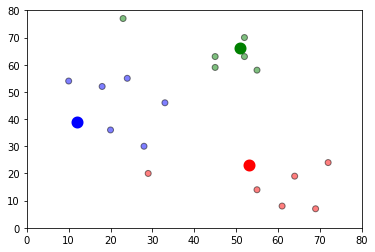

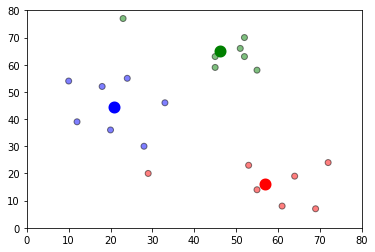

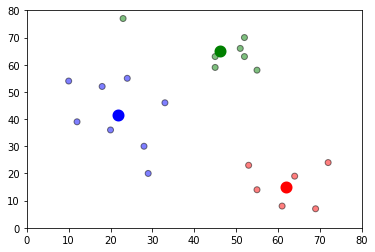

In [34]:
def main():
    
    df = pd.DataFrame({
        'x': [12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 23],
        'y': [39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 77]
    })
    
    k = 3
  
    # 以K-Means++算法初始化质心
    centroids = init_centroids(df,k)

    colmap = {0: 'r', 1: 'g', 2: 'b'}
    df = assignment(df, centroids, colmap)

    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i], linewidths=6)
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()

    for i in range(10):
        key = cv2.waitKey()
        plt.close()

        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(df, centroids)

        plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
        for i in centroids.keys():
            plt.scatter(*centroids[i], color=colmap[i], linewidths=6)
        plt.xlim(0, 80)
        plt.ylim(0, 80)
        plt.show()

        df = assignment(df, centroids, colmap)

        if closest_centroids.equals(df['closest']):
            break


if __name__ == '__main__':
    main()